<Figure size 1400x800 with 0 Axes>

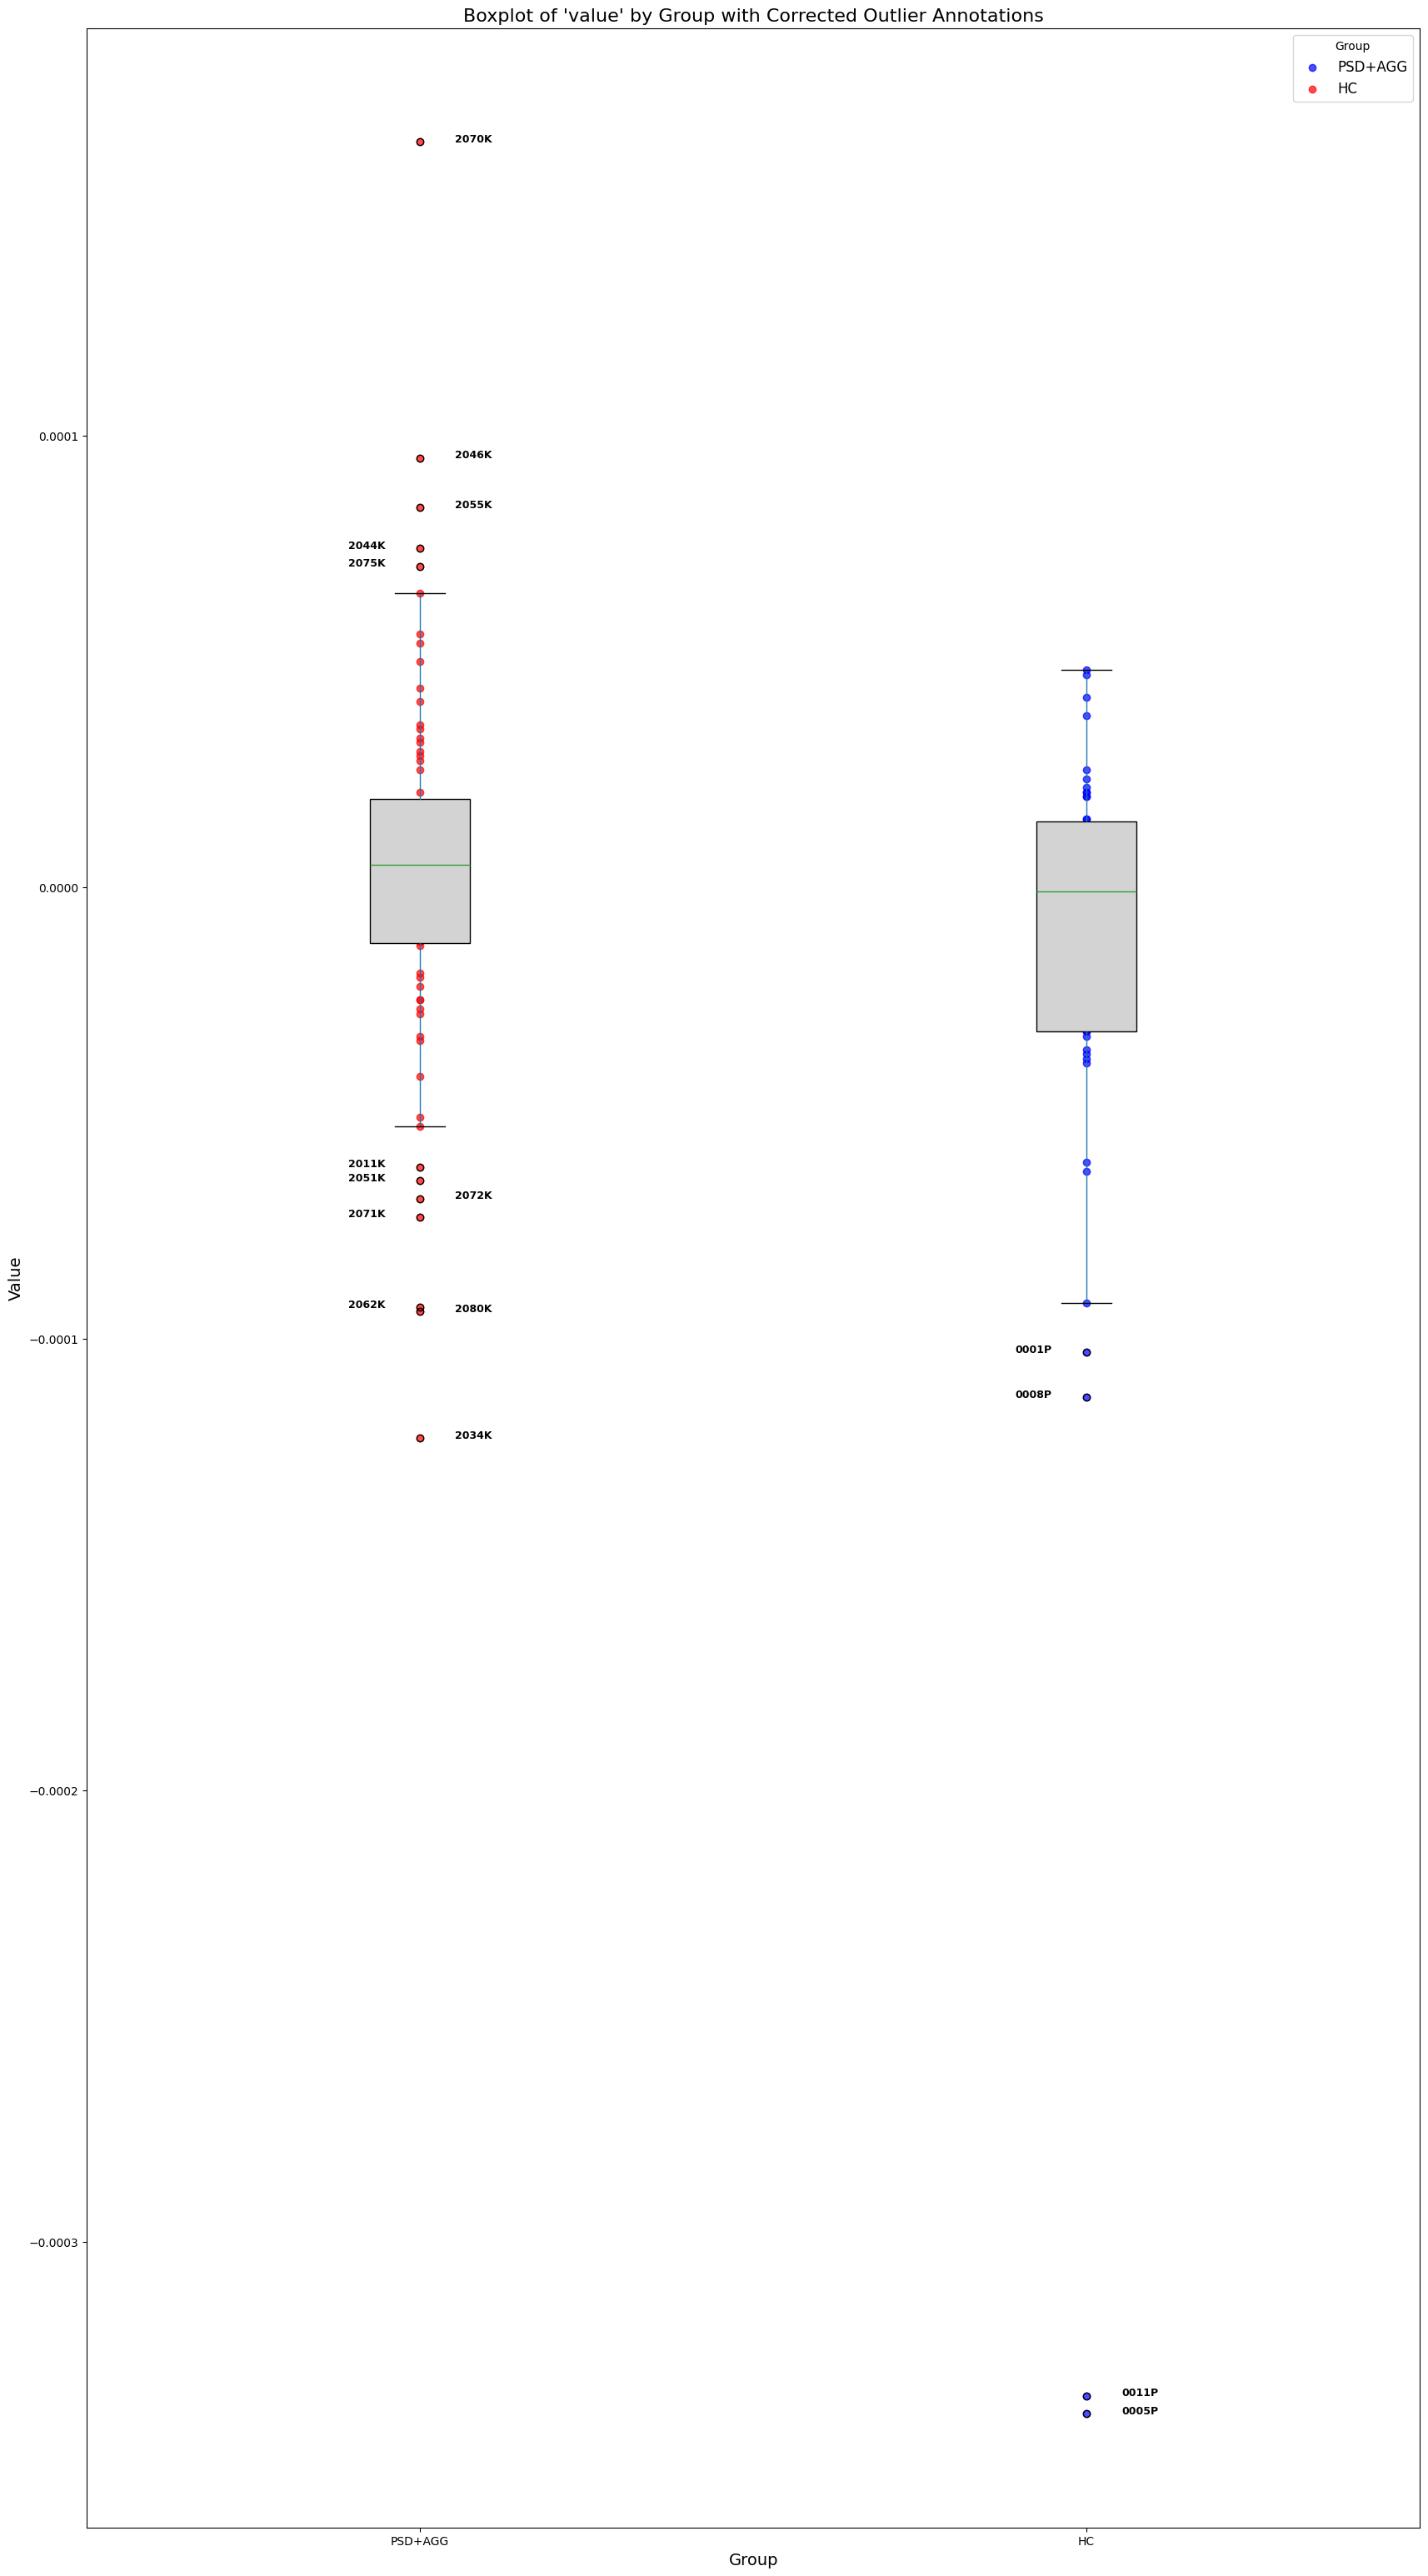

In [48]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load the dataset
file_path = "lrv_con_v5_ch3.csv"
df = pd.read_csv(file_path)

# Function to find outliers within each group using the IQR method
def find_outliers_by_group(data):
    outlier_list = []
    for group in data["group"].unique():
        group_data = data[data["group"] == group]
        Q1 = group_data['value'].quantile(0.25)
        Q3 = group_data['value'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        group_outliers = group_data[(group_data['value'] < lower_bound) | (group_data['value'] > upper_bound)]
        outlier_list.append(group_outliers)
    
    return pd.concat(outlier_list)

# Find outliers within each group separately
corrected_outliers = find_outliers_by_group(df)

# Create a larger figure for better readability
plt.figure(figsize=(14, 8))

# Create a boxplot to visualize distribution
boxplot = df.boxplot(column='value', by='group', grid=False, patch_artist=True, 
                     boxprops=dict(facecolor="lightgray"))

# Define colors for the individual scatter points
group_colors = {"PSD+AGG": "blue", "HC": "red"}

# Plot individual data points
for group in df["group"].unique():
    group_data = df[df["group"] == group]
    x_pos = 1 if group == "HC" else 2  # Adjust x position based on group
    plt.scatter([x_pos] * len(group_data), group_data["value"], 
                color=group_colors[group], alpha=0.7, label=group if group not in plt.gca().get_legend_handles_labels()[1] else "")

# Annotate correctly identified outliers with their IDs
offsets = np.linspace(-0.00005, 0.00005, len(corrected_outliers))  # Small vertical offsets to prevent overlap
for i, (_, row) in enumerate(corrected_outliers.iterrows()):
    x_pos = 1 if row['group'] == "HC" else 2  # Adjust x position based on group
    text_x = x_pos - 0.08 if i % 2 == 0 else x_pos + 0.08  # Staggering left and right
    plt.text(x=text_x, y=row['value'], s=row['id'], ha='center', 
             fontsize=9, color='black', fontweight='bold')

# Formatting the plot
plt.title("Boxplot of 'value' by Group with Corrected Outlier Annotations", fontsize=16)
plt.suptitle("")  # Remove default subtitle
plt.xlabel("Group", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.xticks([1, 2], ["PSD+AGG", "HC"])  # Ensuring correct labels for groups
plt.legend(title="Group", fontsize=12)

# Display the plot
plt.show()